#Suhanee Kandalkar D16AD 30


---



# Exp - 4 Evaluating Sample-Average Methods in Nonstationary Bandit Problems

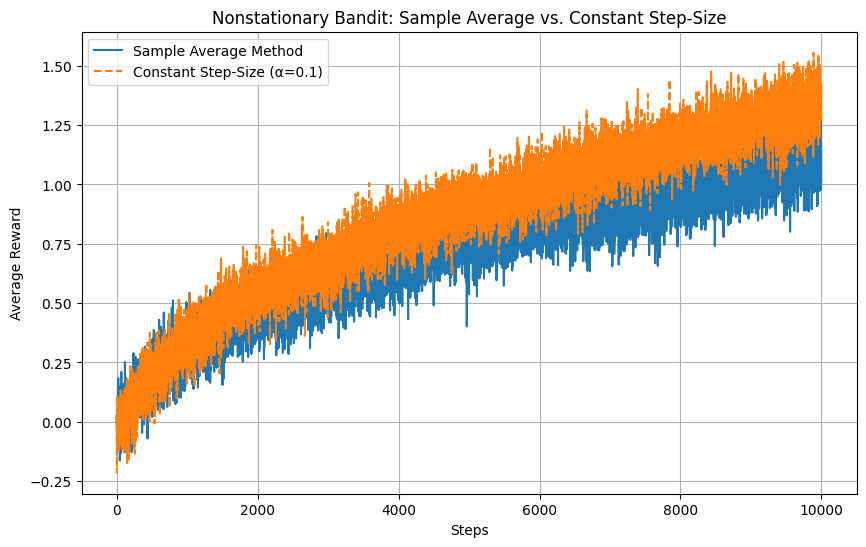

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment parameters
k = 10  # Number of arms
steps = 10000  # Number of time steps
runs = 200  # Number of independent runs
epsilon = 0.1  # Exploration rate
alpha = 0.1  # Step-size for constant step-size method
sigma_walk = 0.01  # Standard deviation for random walk

def run_bandit(sample_average=True):
    rewards_history = np.zeros((runs, steps))

    for run in range(runs):
        q_true = np.zeros(k)  # Initial true action values
        q_estimated = np.zeros(k)  # Estimated action values
        action_counts = np.ones(k)  # Initialize to avoid division by zero

        for t in range(steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.randint(k)  # Explore
            else:
                action = np.argmax(q_estimated)  # Exploit

            # Generate reward
            reward = np.random.normal(q_true[action], 1)
            rewards_history[run, t] = reward

            # Update estimates
            step_size = (1 / action_counts[action]) if sample_average else alpha
            q_estimated[action] += step_size * (reward - q_estimated[action])

            action_counts[action] += 1  # Update count

            # Update true action values with random walk
            q_true += np.random.normal(0, sigma_walk, k)

    return np.mean(rewards_history, axis=0)

# Run experiments
rewards_sample_avg = run_bandit(sample_average=True)
rewards_constant_step = run_bandit(sample_average=False)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(rewards_sample_avg, label="Sample Average Method")
plt.plot(rewards_constant_step, label="Constant Step-Size (\u03b1=0.1)", linestyle="dashed")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Nonstationary Bandit: Sample Average vs. Constant Step-Size")
plt.legend()
plt.grid()
plt.show()
